### Cats and Dogs Classification using CNN

In this workshop, I'm going to create CNN by my own.
We will use pytorch.

In [857]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
import datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder 
from torch.utils.data import DataLoader

In [858]:
torch.__version__

'2.2.0+cpu'

In [859]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [860]:
train_path = "../pytorch/CatDogDataset/train"
test_path = "../pytorch/CatDogDataset/test"
train_dataset = ImageFolder(root=train_path, transform=transform)
test_dataset = ImageFolder(root=test_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [861]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 557
    Root location: ../pytorch/CatDogDataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [862]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 140
    Root location: ../pytorch/CatDogDataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

### Craete Fully Connected Network

In [863]:
class CNN(nn.Module):
    def __init__(self, in_channel=3, num_classes=2):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_channel, out_channels=8, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.pool = nn.MaxPool2d(kernel_size=(3,3), stride=(1,1))
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*15376, num_classes)  # 128/2 = 64 -> 64/2 = 32
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc1(x)
        
        return x

In [864]:
model = CNN()

### Set Device

In [865]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Hyperparameters

In [866]:
learning_rate = 0.001 
batch_size = 64 
num_epochs = 30

### Initialize Network

In [867]:
model = CNN().to(device)

### Loss and Optimizer

In [868]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Train

In [869]:
for epoch in range(num_epochs):
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Get data to CUDA if possible
        data = data.to(device)
        targets = targets.to(device)
        
        # Score
        scores = model(data)
        loss = criterion(scores, targets)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient Descent or Adam Step
        optimizer.step() # Update Weight

In [870]:
train_dataset[2][0]

tensor([[[0.0706, 0.0745, 0.0784,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0784,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0784,  ..., 0.0627, 0.0627, 0.0627],
         ...,
         [0.1765, 0.1882, 0.2000,  ..., 0.0471, 0.0431, 0.0431],
         [0.1804, 0.1922, 0.2078,  ..., 0.0431, 0.0392, 0.0392],
         [0.1804, 0.1922, 0.2078,  ..., 0.0431, 0.0392, 0.0392]],

        [[0.0745, 0.0784, 0.0824,  ..., 0.0667, 0.0667, 0.0667],
         [0.0745, 0.0784, 0.0824,  ..., 0.0667, 0.0667, 0.0667],
         [0.0745, 0.0784, 0.0824,  ..., 0.0667, 0.0667, 0.0667],
         ...,
         [0.1961, 0.2039, 0.2118,  ..., 0.0471, 0.0431, 0.0431],
         [0.2000, 0.2078, 0.2157,  ..., 0.0431, 0.0392, 0.0392],
         [0.2000, 0.2078, 0.2196,  ..., 0.0431, 0.0392, 0.0392]],

        [[0.0941, 0.0980, 0.1020,  ..., 0.0863, 0.0863, 0.0863],
         [0.0941, 0.0980, 0.1020,  ..., 0.0863, 0.0863, 0.0863],
         [0.0941, 0.0980, 0.1020,  ..., 0.0863, 0.0863, 0.

In [871]:
train_dataset.targets

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Evaluation

In [872]:
def check_accuracy(loader, model):
    if train_loader:
        print("Checking accuracy on training data")
    else:
        print("Checking accuracy on test data")  
          
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            # x = x.reshape(x.shape[0], -1)
            
            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")
        
    model.train()

In [873]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Checking accuracy on training data
Got 557 / 557 with accuracy 100.00
Checking accuracy on training data
Got 84 / 140 with accuracy 60.00


Prediction : 1
Predicted :  Dog


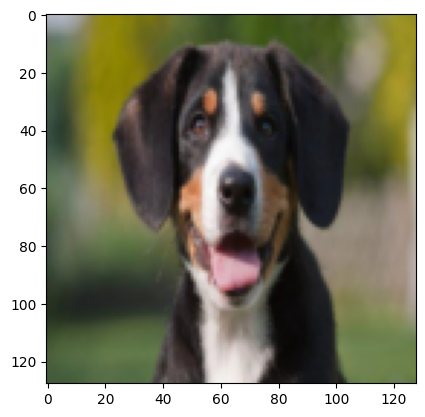

In [874]:
import matplotlib.pyplot as plt 

model.eval()

data, target = test_dataset[99]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction : {prediction}')

classes = ['Cat', 'Dog']
print("Predicted : ", classes[prediction])

image = data.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Transpose to (28, 28, 3)

plt.imshow(image, cmap='gray')
plt.show()


In [875]:
test_dataset[0]

(tensor([[[0.3725, 0.4275, 0.4549,  ..., 0.2784, 0.2941, 0.3176],
          [0.3569, 0.3961, 0.4118,  ..., 0.2667, 0.2902, 0.3098],
          [0.3569, 0.3765, 0.3765,  ..., 0.2588, 0.2863, 0.3098],
          ...,
          [0.1765, 0.1804, 0.1804,  ..., 0.2549, 0.2431, 0.2235],
          [0.3098, 0.3098, 0.3020,  ..., 0.2667, 0.2549, 0.2392],
          [0.2000, 0.1922, 0.1843,  ..., 0.2392, 0.2314, 0.2314]],
 
         [[0.5490, 0.5647, 0.5725,  ..., 0.5451, 0.5529, 0.5686],
          [0.5451, 0.5529, 0.5608,  ..., 0.5333, 0.5451, 0.5608],
          [0.5451, 0.5490, 0.5529,  ..., 0.5333, 0.5451, 0.5569],
          ...,
          [0.1412, 0.1451, 0.1451,  ..., 0.1647, 0.1608, 0.1647],
          [0.2784, 0.2784, 0.2706,  ..., 0.1804, 0.1804, 0.1804],
          [0.2000, 0.1922, 0.1843,  ..., 0.1804, 0.1765, 0.1725]],
 
         [[0.6078, 0.6196, 0.6118,  ..., 0.5804, 0.5922, 0.6157],
          [0.5961, 0.6078, 0.6118,  ..., 0.5804, 0.5922, 0.6078],
          [0.6000, 0.6118, 0.6118,  ...,

### Save Model

In [876]:
import pickle

filename = "catdogclassification.sav"
pickle.dump(model, open(filename, 'wb'))

### Load Model

In [ ]:
import pickle

filename = "catdogclassification.sav"
loaded_model = pickle.load(open(filename, 'rb'))

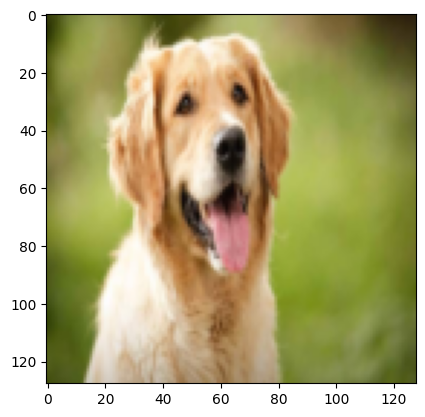

In [883]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

import torchvision
from PIL import Image

input_path = r"../pytorch/dog.jpg"
input_data = Image.open(input_path)  # Open image with PIL
# input_data = torchvision.io.read_image(path=input_path)
input_data = transform(input_data)
input_data = input_data.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Transpose to (28, 28, 3)

plt.imshow(input_data)
plt.show()

In [884]:
input_data = torch.tensor(input_data)
# expected 3 128 128
input_data = input_data.reshape(3,128,128)

In [885]:
print(input_data)
print(input_data.shape)

tensor([[[0.2118, 0.2431, 0.0549,  ..., 0.0392, 0.2431, 0.2588],
         [0.0392, 0.2549, 0.2745,  ..., 0.5647, 0.3804, 0.6392],
         [0.5569, 0.3725, 0.6353,  ..., 0.1686, 0.1373, 0.0549],
         ...,
         [0.7412, 0.4275, 0.6980,  ..., 0.4118, 0.4353, 0.1922],
         [0.4627, 0.4745, 0.1569,  ..., 0.3804, 0.8863, 0.7255],
         [0.5490, 0.9020, 0.7294,  ..., 0.7176, 0.4353, 0.7216]],

        [[0.7412, 0.4314, 0.7020,  ..., 0.4196, 0.4431, 0.1922],
         [0.4784, 0.4784, 0.1765,  ..., 0.4235, 0.9098, 0.7647],
         [0.6118, 0.9176, 0.7569,  ..., 0.7294, 0.4549, 0.7216],
         ...,
         [0.3176, 0.7176, 0.4784,  ..., 0.6667, 0.2157, 0.5922],
         [0.6667, 0.2157, 0.5922,  ..., 0.4392, 0.4471, 0.1529],
         [0.3333, 0.3804, 0.1059,  ..., 0.4157, 0.7686, 0.5451]],

        [[0.3176, 0.7490, 0.5098,  ..., 0.6706, 0.2196, 0.5961],
         [0.6706, 0.2196, 0.5922,  ..., 0.4353, 0.4471, 0.1529],
         [0.3216, 0.3686, 0.1098,  ..., 0.4392, 0.7961, 0.

In [886]:
model.eval()

data = input_data.unsqueeze(0)

data = torch.tensor(data,dtype=torch.float)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction : {prediction}')

classes = ['Cat', 'Dog']
print("Predicted : ", classes[prediction])

Prediction : 1
Predicted :  Dog


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_10412\387036571.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data,dtype=torch.float)


In [882]:
data = torch.tensor(data)
data

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_10412\1327241382.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data)


tensor([[[[0.6745, 0.5961, 0.3569,  ..., 0.4275, 0.7176, 0.6157],
          [0.4157, 0.7098, 0.6078,  ..., 0.4000, 0.3059, 0.6118],
          [0.4000, 0.3020, 0.6078,  ..., 0.1137, 0.0471, 0.0196],
          ...,
          [0.7020, 0.6549, 0.7451,  ..., 0.1882, 0.0902, 0.0431],
          [0.8745, 0.7961, 0.5529,  ..., 0.3333, 0.4549, 0.3765],
          [0.3176, 0.4078, 0.3373,  ..., 0.7020, 0.6667, 0.7412]],

         [[0.7412, 0.7020, 0.7725,  ..., 0.1922, 0.0941, 0.0471],
          [0.8745, 0.7961, 0.5529,  ..., 0.4157, 0.5882, 0.5137],
          [0.4549, 0.5216, 0.4588,  ..., 0.7176, 0.6824, 0.7529],
          ...,
          [0.4980, 0.6275, 0.5608,  ..., 0.6627, 0.5333, 0.7490],
          [0.6588, 0.5098, 0.7412,  ..., 0.1255, 0.0706, 0.0471],
          [0.5608, 0.4627, 0.3843,  ..., 0.5333, 0.6706, 0.6118]],

         [[0.5647, 0.6471, 0.5843,  ..., 0.6980, 0.5804, 0.7098],
          [0.6157, 0.4784, 0.5804,  ..., 0.1137, 0.0706, 0.0549],
          [0.5490, 0.4627, 0.3922,  ..., 0